In [1]:
%run data_analyse.ipynb
import classes
import functies
import sympy as sp
from matplotlib import pyplot as plt
import numpy as np

initialised


In [2]:
###bereken de fouten op de verdunningsreeksen
Cstock, Vstock, Vadd, Cnew = sp.symbols('Cstock Vstock Vadd Cnew')
Cnewvgl = classes.vergelijking(Cstock*Vstock/(Vadd+Vstock), [Cstock, Vstock, Vadd])
Cnewvglsympy = Cstock*Vstock/(Vadd+Vstock)
cstock = functies.vector_to_datapunt([60e-6, 0.5e-6, 'N'], Cstock) #M
#verdunning 1
vs1 = [3e-3, 0.1e-3, 'U'] #l, gemeten met gegradueerd pipet
va1 = [57e-3, 0.07e-3, 'N'] #l, gemeten met buret, twee metingen dus maal sqrt(2)
#verdunning 2
vs2 = [10e-3, 0.02e-3, 'U'] #l, gemeten met volumetrisch pipet
va2 = [90e-3, 0.1e-3 , 'U'] #l, gemeten met maatkolf
#verdunning 3
vs3 = [6e-3, 0.1e-3, 'U'] #l, gemeten met gegradueerd pipet
va3 = [34e-3, 0.05e-3, 'U'] #l, gemeten met buret
#verdunning 4
vs4 = [20e-3, 0.02e-3, 'U'] #l, gemeten met volumetrisch pipet
va4 = [80e-3, 0.1e-3 , 'U'] #l, gemeten met maatkolf
print('##############################oude code############################################# (die niet! werkt)')
parameters = [Cstock, Vstock, Vadd]
cs = [60e-6, 0.5e-6, 'N']
stockconcentraties_matrix = [cs,cs,cs,cs]
stockvolumes_matrix = [vs1, vs2, vs3, vs4]
toegevoegde_volumes_matrix = [va1, va2, va3, va4]

gegevensmatrix = [[cs, vs1, va1],[cs, vs2, va2],[cs, vs3, va3],[cs, vs4, va4],]
                  

display(Cnewvglsympy)

outp = multiple_analysis(Cnewvglsympy, parameters, gegevensmatrix)
print(outp)
for meting in outp:
    #omzetten naar µM
    meting[0] *= 10**6
    meting[1] *= 10**6
    #latex_print_meting(meting)

print('########################met sam zijn code#######################################"')


stockvolumes_datapunten = functies.matrix_to_datapunten(stockvolumes_matrix, Vstock)
toegevoegde_volumes_datapunten = functies.matrix_to_datapunten(toegevoegde_volumes_matrix, Vadd)
parameters = [Cstock, Vstock, Vadd]
metingen = [[cstock, stockvolumes_datapunten[i],toegevoegde_volumes_datapunten[i]] for i in range(len(stockvolumes_datapunten))]

cnew = functies.multiple_analysis(Cnewvgl,metingen,Cnew)

print(cnew)
print('\n########################latex-output (sam zijn code)##############################\n')
for indx in range(len(cnew)):
    data = cnew[indx]
    functies.latex_print_meting(stockvolumes_matrix[indx],'volume stockoplossing')
    functies.latex_print_meting(toegevoegde_volumes_matrix[indx],'toegevoegde volumes')
    functies.latex_print_meting(data)
    print('\n')

##############################oude code############################################# (die niet! werkt)


Cstock*Vstock/(Vadd + Vstock)

[[3.00000000000000e-6 3.72737619959850e-8]
 [6.00000000000000e-6 5.01270386119108e-8]
 [9.00000000000000e-6 8.36076215126348e-8]
 [1.20000000000000e-5 1.00098351634780e-7]]
########################met sam zijn code#######################################"
[datapunt: Cnew = [3.00000000000000e-6, 6.03786662102877e-8, 'Normaal']
 datapunt: Cnew = [6.00000000000000e-6, 5.05062372385827e-8, 'Normaal']
 datapunt: Cnew = [9.00000000000000e-6, 1.05289778706197e-7, 'Normaal']
 datapunt: Cnew = [1.20000000000000e-5, 1.00392828429126e-7, 'Normaal']]

########################latex-output (sam zijn code)##############################

$volume stockoplossing = (30.0 \pm 1.0)\cdot 10^{-4}$
$toegevoegde volumes = (5700.0 \pm 7.0)\cdot 10^{-5}$
$Cnew = (300.000000000000 \pm 6.00000000000000)\cdot 10^{-8}$


$volume stockoplossing = (1000.0 \pm 2.0)\cdot 10^{-5}$
$toegevoegde volumes = (900.0 \pm 1.0)\cdot 10^{-4}$
$Cnew = (600.000000000000 \pm 5.1)\cdot 10^{-8}$


$volume stockoplossing = (60.0 \pm 1.0)

In [3]:
import winsound
winsound.PlaySound("SystemExit", winsound.SND_ALIAS)

Help on function fit_2D in module functies:

fit_2D(parameters, model, initial_vals, x_val, y_val, x_variance, y_variance, grootteorde=1, x_as_titel='X-as', y_as_titel='Y-as', titel='Fit', figure_name=None, size=None, error_method='Old', savefig=False, detailed_logs=False, fontsize=18, titlesize=20, axsize=16)
    OUTDATED CODE, GEBRUIK NIEUWERE FUNCTIES INDIEN DEZE AL GEÏMPLEMENTEERD ZIJN
    #################################
    @param:
     - parameters: De parameters van het model, in een vector gegeven
     - model: Het model dat gefit wordt. Dit dient een functie model(x, param) te zijn die in x een vector datapunten kan accepteren
     - initial_vals: Initiële waardes voor de fitparameters
     - x_val: Een vector met x_waardes
     - y_val: Een vector met y_waardes van dezelfde grootte als x_val
     - x_variance: De varianties van de x_waardes, in dezelfde volgorde en van dezelfde lengte als x_val
     - y_variance: De varianties van de y_waardes, in dezelfde volgorde en van d

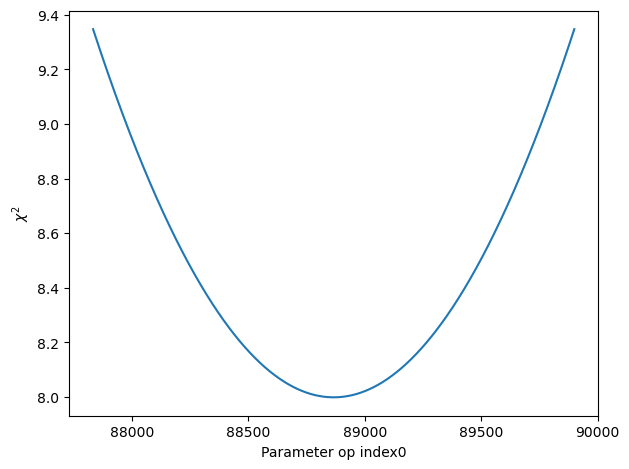

De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0.039152
De gereduceerde chi^2 waarde is: 2.7862


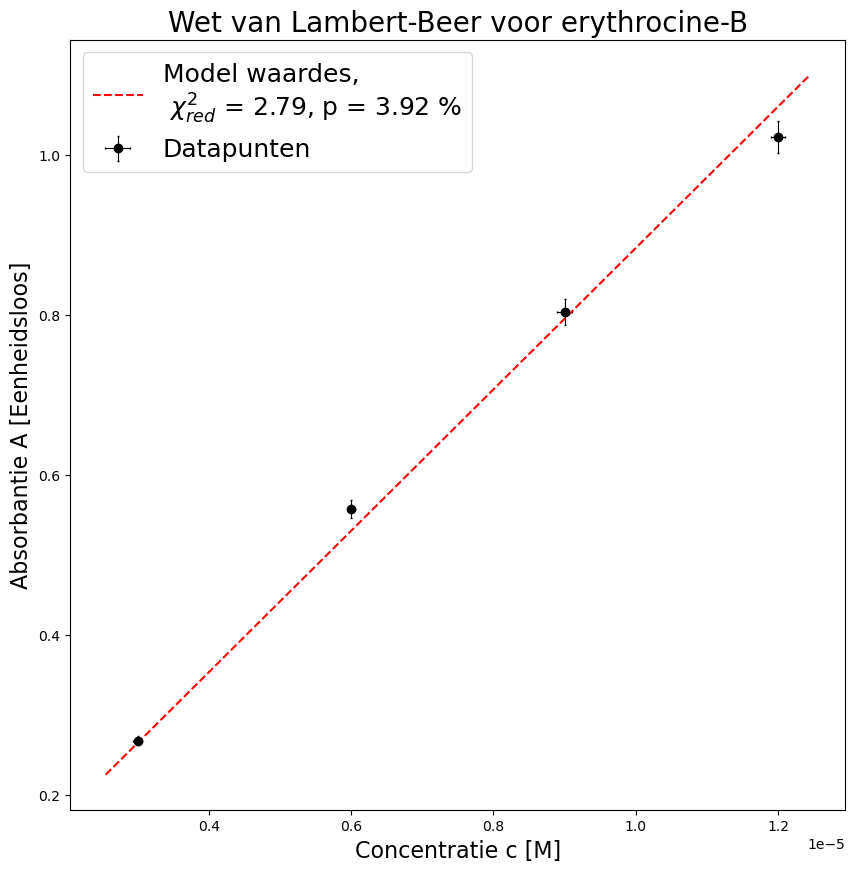

[[88333.33333333334, (499.0967306876846, 1565.9300861249794), 'S']]

In [4]:
def lineair(c, param):
    epsiloneff = param[0]
    return epsiloneff*c
def initial_vals(x,y):
    return [1.06e5/1.2]
concentraties = np.array([cnew[i].get_val() for i in range(len(cnew))],dtype = float)
x_variantie = np.array([cnew[i].get_variance() for i in range(len(cnew))],dtype = float)
absorbanties = np.array([0.268, 0.557, 0.803, 1.022],dtype = float) #dimensieloos
parameter = ['epsilon_effectief']
y_fouten = 0.02*absorbanties
y_variantie = y_fouten**2

help(functies.fit_2D)
print(absorbanties)
print(concentraties)
print(x_variantie)
print(y_variantie)
print('#########################################')
outp = functies.fit_2D(parameter, lineair, initial_vals, concentraties, absorbanties, x_variance=x_variantie, y_variance = y_variantie, x_as_titel = 'Concentratie c [M]', y_as_titel = 'Absorbantie A [Eenheidsloos]',
                titel = 'Wet van Lambert-Beer voor erythrocine-B',savefig = True, detailed_logs= True)
display(outp)

Raw output
  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 9.376751713983147
        x: [ 8.897e+04]
      nit: 3
      jac: [ 3.576e-07]
 hess_inv: [[ 3.962e+05]]
     nfev: 24
     njev: 12
[[88087.05582700793, 89857.4694216154]]
epsilon_effectief heeft als waarde: 88972 + 885.27 - 885.14 met 68% betrouwbaarheidsinterval: [88087, 89857] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0.024679
De gereduceerde chi^2 waarde is: 3.1256


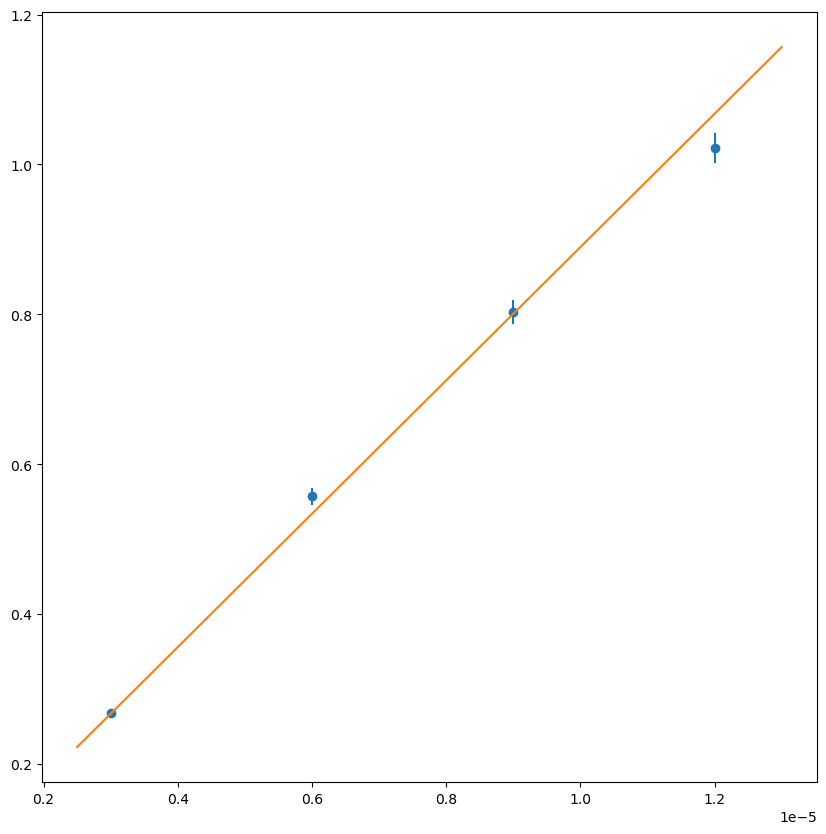

Andere verdelingen nog niet geïmplementeerd, fout als wortel van variantie genomen


TypeError: unsupported operand type(s) for ** or pow(): 'tuple' and 'int'

In [6]:
#fit het boeltje
parameter = ['epsilon_effectief']
epsilon_fitwaarde = functies.fit(parameter, lineair, initial_vals, concentraties, absorbanties, y_err = y_fouten)[0]
t = np.linspace(2.5*10**-6, 13*10**-6, 10000)
fig, ax = plt.subplots(1,1, figsize = (10,10))
ax.errorbar(concentraties, absorbanties, yerr = y_fouten, fmt = 'o')
ax.errorbar(t, lineair(t, epsilon_fitwaarde))
plt.show()

A, epsilon_eff = sp.symbols('A epsilon_eff')
concentratie_voorschrift = classes.vergelijking(A/epsilon_eff, [A, epsilon_eff])
absorbantie_onbekend = [1.690, 0.02*1.690, 'U']
absorbantie_onbekend = functies.vector_to_datapunt(absorbantie_onbekend, A)
epsilon_fitwaarde = functies.vector_to_datapunt(outp[0], epsilon_eff)

concentratie_onbekend = functies.data_analyse(concentratie_voorschrift, [absorbantie_onbekend, epsilon_fitwaarde], sp.Symbol('C_onbekend'))
print(concentratie_onbekend)


In [1]:
fig, ax = plt.subplots(1,1, figsize = (8,8))

#de gekende punten en de fit
ax.errorbar(concentraties, absorbanties, yerr = y_fouten, linestyle = ' ', color = 'black', label = 'gemeten')
concentratie_linspace = np.linspace(0,20e-6)
ax.plot(concentratie_linspace, lineair(concentratie_linspace, [epsilon_fitwaarde.get_val()]), label = 'model')

#het onbekende punt
ax.errorbar(concentratie_onbekend.get_val(),absorbantie_onbekend.get_val(), yerr = absorbantie_onbekend.get_fout(), xerr = concentratie_onbekend.get_fout(), label = 'onbekende concentratie')


ax.set_xlabel('concentratie [M]')
ax.set_ylabel('absorbantie [dimensieloos]')
ax.set_title('De concentraties versus de absorbanties van erythrocine-B')
ax.legend()
plt.tight_layout();plt.show()

NameError: name 'plt' is not defined